In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import numpy as np

In [2]:

# Load Inpatient Data (Json)
inpatient_2011=pd.read_json('inpatient_2011.json')
inpatient_2012=pd.read_json('inpatient_2012.json')
inpatient_2013=pd.read_json('inpatient_2013.json')

In [3]:
inpatient_2013.head(5)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,2618.166667,2986.750000,2007.083333,G81
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,3136.666667,3754.833333,2871.500000,J02
2,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,11,3215.000000,3685.454545,2939.636364,D28
3,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,26,3240.269231,4103.500000,3264.269231,D31
4,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,14,3678.928571,3825.357143,3068.214286,D18


In [4]:
inpatient_2012.shape

(10000, 12)

In [5]:
#merge the inpatient data
inpatient_df=pd.concat([inpatient_2011,inpatient_2012,inpatient_2013],ignore_index=True)


In [6]:
inpatient_df.shape

(30000, 12)

In [7]:
#Save the inpatient charges data for each year in an inpatient_charges database.
conn=sqlite3.connect('inpatient_charges.sql')
inpatient_2011.to_sql(name='inpatient_charges_2011',con=conn,if_exists='replace',index=False)
inpatient_2012.to_sql(name='inpatient_charges_2012',con=conn,if_exists='replace',index=False)
inpatient_2013.to_sql(name='inpatient_charges_2013',con=conn,if_exists='replace',index=False)
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print("Tables in the database:", tables)
#conn2.close()

Tables in the database: [('provider_info',), ('provider_infomation',), ('provider_information',), ('inpatient_charges_2011',), ('inpatient_charges_2012',), ('inpatient_charges_2013',)]


In [8]:
#Read the tables in the database to make sure the data was stored properly
in_2011=pd.read_sql_query("SELECT*FROM inpatient_charges_2011",conn)
in_2012=pd.read_sql_query("SELECT * FROM inpatient_charges_2012",conn)
in_2013=pd.read_sql_query("SELECT * FROM inpatient_charges_2013",conn)

In [9]:
in_2013.head(2)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,2618.166667,2986.750000,2007.083333,G81
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,3136.666667,3754.833333,2871.500000,J02


In [10]:
#Read the data in the provided outpatient_charges.db database
#create a connection with the database
conn2=sqlite3.connect('outpatient_charges.db')

In [11]:

# Load Outpatient Data (SQLite Database)
outpatient_2011=pd.read_sql_query("SELECT * FROM outpatient_charges_2011",conn2)
outpatient_2012=pd.read_sql_query("SELECT * FROM outpatient_charges_2012",conn2)
outpatient_2013=pd.read_sql_query("SELECT *FROM outpatient_charges_2013",conn2)

In [12]:
outpatient_2011.head(3)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,299.867992,104.416068
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,14,5409.921429,527.096429


In [13]:
outpatient_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          43372 non-null  int64  
 1   provider_name                        43372 non-null  object 
 2   provider_street_address              43372 non-null  object 
 3   provider_city                        43372 non-null  object 
 4   provider_state                       43372 non-null  object 
 5   provider_zipcode                     43372 non-null  int64  
 6   apc                                  43372 non-null  object 
 7   outpatient_services                  43372 non-null  int64  
 8   average_estimated_submitted_charges  43372 non-null  float64
 9   average_total_payments               43372 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.3+ MB


In [14]:
outpatient_2011.shape

(43372, 10)

In [15]:
# Load Provider Info (CSV)
provider_info=pd.read_csv('hospital_general_info.csv')

In [16]:
provider_info.head(2)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,readmission_measures_footnote,patient_experience_measures_count,facility_patient_experience_measures_count,patient_experience_measures_footnote,timely_and_effective_care_measures_count,facility_timely_and_effective_care_measures_count,timely_and_effective_care_measures_footnote
0,010018,CALLAHAN EYE HOSPITAL,"1720 UNIVERSITY BLVD, SUITE 500",BIRMINGHAM,AL,35233,Jefferson,(205) 325-8100,Acute Care Hospitals,Voluntary non-profit - Private,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
1,010051,GREENE COUNTY HOSPITAL,509 WILSON AVENUE,EUTAW,AL,35462,Greene,(205) 372-3388,Acute Care Hospitals,Government - Local,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN


In [17]:
provider_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            5336 non-null   object 
 1   hospital_name                                          5336 non-null   object 
 2   address                                                5336 non-null   object 
 3   city                                                   5336 non-null   object 
 4   state                                                  5336 non-null   object 
 5   zip_code                                               5336 non-null   int64  
 6   county_name                                            5336 non-null   object 
 7   phone_number                                           5336 non-null   object 
 8   hospital_type                                   

In [18]:
provider_info['provider_id'] = pd.to_numeric(provider_info['provider_id'], errors='coerce')

In [19]:
#Identify null values in the provider_id and remove them
provider_info.isnull().sum()

provider_id                                                35
hospital_name                                               0
address                                                     0
city                                                        0
state                                                       0
zip_code                                                    0
county_name                                                 0
phone_number                                                0
hospital_type                                               0
hospital_ownership                                          0
emergency_services                                          0
meets_criteria_for_promoting_interoperability_of_ehrs    1450
hospital_overall_rating                                     0
hospital_overall_rating_footnote                         3270
mortality_group_measure_count                               0
facility_mortaility_measures_count                          0
mortalit

In [20]:
#Removing the null values so that we can be to join provide_id on the inpatient and outpatient data
provider_info=provider_info.dropna(subset=['provider_id'])
provider_info['provider_id']=provider_info['provider_id'].astype('int64')

In [21]:
provider_info.head(3)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,readmission_measures_footnote,patient_experience_measures_count,facility_patient_experience_measures_count,patient_experience_measures_footnote,timely_and_effective_care_measures_count,facility_timely_and_effective_care_measures_count,timely_and_effective_care_measures_footnote
0,10018,CALLAHAN EYE HOSPITAL,"1720 UNIVERSITY BLVD, SUITE 500",BIRMINGHAM,AL,35233,Jefferson,(205) 325-8100,Acute Care Hospitals,Voluntary non-profit - Private,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
1,10051,GREENE COUNTY HOSPITAL,509 WILSON AVENUE,EUTAW,AL,35462,Greene,(205) 372-3388,Acute Care Hospitals,Government - Local,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
2,10102,J PAUL JONES HOSPITAL,317 MCWILLIAMS AVENUE,CAMDEN,AL,36726,Wilcox,(334) 682-4131,Acute Care Hospitals,Voluntary non-profit - Other,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN


Combining and merging the data

In [22]:
#save the provider_info dataset to both the inpatient and outpatient database
provider_info.to_sql(name='provider_information',con=conn,if_exists='replace',index=False)
provider_info.to_sql(name='provider_information',con=conn2,if_exists='replace',index=False)

5301

In [23]:
#Create a function that merges the inpatient and outpatient data with the provider info
def merge_data(df,provider_info):
    merged_df=pd.merge(df,provider_info,on='provider_id',how='inner')
    return merged_df

In [24]:
#merge the outpatient data to one csv file without joining with provider_info dataset
outpatient_concat=pd.concat([outpatient_2011,outpatient_2012,outpatient_2013])

In [25]:
print(f"outpatient_concat:{outpatient_concat.shape}")
print(f"outpatient_2011:{outpatient_2011.shape}")
print(f"outpatient_2012:{outpatient_2012.shape}")
print(f"outpatient_2013:{outpatient_2013.shape}")

outpatient_concat:(131510, 10)
outpatient_2011:(43372, 10)
outpatient_2012:(43783, 10)
outpatient_2013:(44355, 10)


In [26]:
#merge the outpatient data to one csv file joining with provider_info dataset
outpatient_2011_info=merge_data(df=outpatient_2011,provider_info=provider_info)
outpatient_2012_info=merge_data(df=outpatient_2012,provider_info=provider_info)
outpatient_2013_info=merge_data(df=outpatient_2013,provider_info=provider_info)


In [27]:
print(f"outpatient_info_2011:{outpatient_2011_info.shape}")
print(f"outpatient_info_2012:{outpatient_2012_info.shape}")
print(f"outpatient_info_2013:{outpatient_2013_info.shape}")

outpatient_info_2011:(40204, 47)
outpatient_info_2012:(40958, 47)
outpatient_info_2013:(41796, 47)


In [28]:
#merge the outpatient data to one csv file without joining with provider_info dataset
inpatient_concat=pd.concat([inpatient_2011,inpatient_2012,inpatient_2013])
print(f"inpatient_df: {inpatient_concat.shape}")

inpatient_df: (30000, 12)


In [29]:
print(f"inpatient_concat:{inpatient_concat.shape}")
print(f"inpatient_2011:{inpatient_2011.shape}")
print(f"inpatient_2012:{inpatient_2012.shape}")
print(f"inpatient_2013:{inpatient_2013.shape}")

inpatient_concat:(30000, 12)
inpatient_2011:(10000, 12)
inpatient_2012:(10000, 12)
inpatient_2013:(10000, 12)


In [30]:
#merge the inpatient data to one csv file joined with provider_info dataset
inpatient_2011_info=merge_data(df=inpatient_2011,provider_info=provider_info)
inpatient_2012_info=merge_data(df=inpatient_2012,provider_info=provider_info)
inpatient_2013_info=merge_data(df=inpatient_2013,provider_info=provider_info)

In [31]:
print(f"inpatient_info_2011:{inpatient_2011_info.shape}")
print(f"inpatient_info_2012:{inpatient_2012_info.shape}")
print(f"inpatient_info_2013:{inpatient_2013_info.shape}")

inpatient_info_2011:(9232, 49)
inpatient_info_2012:(9303, 49)
inpatient_info_2013:(9381, 49)


In [32]:
inpatient_2011.shape

(10000, 12)

In [33]:
# Query to combine inpatient records and join with provider information
query = '''
    SELECT * FROM (
        SELECT * FROM inpatient_charges_2011
        UNION ALL
        SELECT * FROM inpatient_charges_2012
        UNION ALL
        SELECT * FROM inpatient_charges_2013
    ) AS all_inpatient
    INNER JOIN provider_info
    ON all_inpatient.provider_id = provider_info.provider_id;
'''

# Run the query and convert result to a DataFrame
combined_inpatient_df = pd.read_sql_query(query, conn)


In [34]:
combined_inpatient_df.shape

(27916, 50)

In [35]:
query2= '''
    SELECT * FROM (
        SELECT * FROM outpatient_charges_2011
        UNION ALL
        SELECT * FROM outpatient_charges_2012
        UNION ALL
        SELECT * FROM outpatient_charges_2013
    ) AS all_outpatient
    INNER JOIN provider_information
    ON all_outpatient.provider_id=provider_information.provider_id
'''
#Run query and convert results to a dataframe
combined_outpatient_df=pd.read_sql_query(query2,conn2)

In [36]:
combined_outpatient_df.shape

(122958, 48)

In [37]:
print(f"combined_outpatient_df: {combined_outpatient_df.shape}")
print(f"combined_inpatient_df: {combined_inpatient_df.shape}")

combined_outpatient_df: (122958, 48)
combined_inpatient_df: (27916, 50)


In [38]:
#close the connections forn inpatient and outpatient
conn.close()
conn2.close()

ANALYSIS

In [39]:
#Connect the two databases
conn3=sqlite3.connect('inpatient_charges.sql')
#attach the second databases within the same connection
conn3.execute("ATTACH DATABASE 'outpatient_charges.db' AS outpatient_charges;")

In [40]:
#Test the connection
inp=pd.read_sql_query("SELECT * FROM inpatient_charges_2011",conn3)

In [41]:
inp.head(2)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,15,2459.400000,2901.266667,2075.400000,G81
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,35,2749.942857,4784.514286,4018.542857,T79


# Analysis 1: Average Outpatient and Inpatient Medicare Payments Ranked by Provider for Each Year

In [42]:
outpatient_2011.head(1)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032


In [43]:
inpatient_2011.head(1)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,15,2459.4,2901.266667,2075.4,G81


1. Average Outpatient and Inpatient Medicare Payments Ranked by Provider

In [69]:
outpatient_inpatient_query='''-- Combined query for average payments per provider per year (outpatient and inpatient)

WITH outpatient AS (
    SELECT 
        provider_id, 
        provider_name,
        '2011' AS year,
        AVG(average_total_payments) AS avg_outpatient_payment
    FROM outpatient_charges_2011
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id, 
        provider_name,
        '2012' AS year,
        AVG(average_total_payments) AS avg_outpatient_payment
    FROM outpatient_charges_2012
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id, 
        provider_name,
        '2013' AS year,
        AVG(average_total_payments) AS avg_outpatient_payment
    FROM outpatient_charges_2013
    GROUP BY provider_id, provider_name
),
inpatient AS (
    SELECT 
        provider_id,
        provider_name,
        '2011' AS year,
        AVG(average_medicare_payments) AS avg_inpatient_payment
    FROM inpatient_charges_2011
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        '2012' AS year,
        AVG(average_medicare_payments) AS avg_inpatient_payment
    FROM inpatient_charges_2012
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        '2013' AS year,
        AVG(average_medicare_payments) AS avg_inpatient_payment
    FROM inpatient_charges_2013
    GROUP BY provider_id, provider_name
)

-- Combine outpatient and inpatient data and calculate total average payment per provider
SELECT 
    o.provider_id,
    o.provider_name,
    o.year,
    COALESCE(o.avg_outpatient_payment, 0) + COALESCE(i.avg_inpatient_payment, 0) AS total_avg_payment,
    RANK() OVER (ORDER BY (COALESCE(o.avg_outpatient_payment, 0) + COALESCE(i.avg_inpatient_payment, 0)) DESC) AS payment_rank
FROM outpatient o
LEFT JOIN inpatient i 
ON o.provider_id = i.provider_id AND o.year = i.year
ORDER BY payment_rank;
'''

In [71]:
total_avg=pd.read_sql_query(outpatient_inpatient_query,conn3)

In [46]:
total_avg.sort_values(by='total_avg_payment',ascending=False)

,provider_id,provider_name,year,total_avg_payment,payment_rank
0,370190,SOUTHWESTERN REGIONAL MEDICAL CENTER,2013,31357.124646,1
1,150166,PINNACLE HOSPITAL,2011,25303.094215,2
2,130063,TREASURE VALLEY HOSPITAL,2012,20298.018098,3
3,130063,TREASURE VALLEY HOSPITAL,2011,18969.187880,4
4,330399,ST BARNABAS HOSPITAL,2013,18873.066679,5
...,...,...,...,...,...
9310,450620,DIMMIT REGIONAL HOSPITAL,2012,50.964524,9311
9311,190268,LAFAYETTE GENERAL SURGICAL HOSPITAL,2013,50.872857,9312
9312,450620,DIMMIT COUNTY MEMORIAL HOSPITAL,2011,49.270000,9313
9313,170187,SALINA SURGICAL HOSPITAL,2011,46.040000,9314


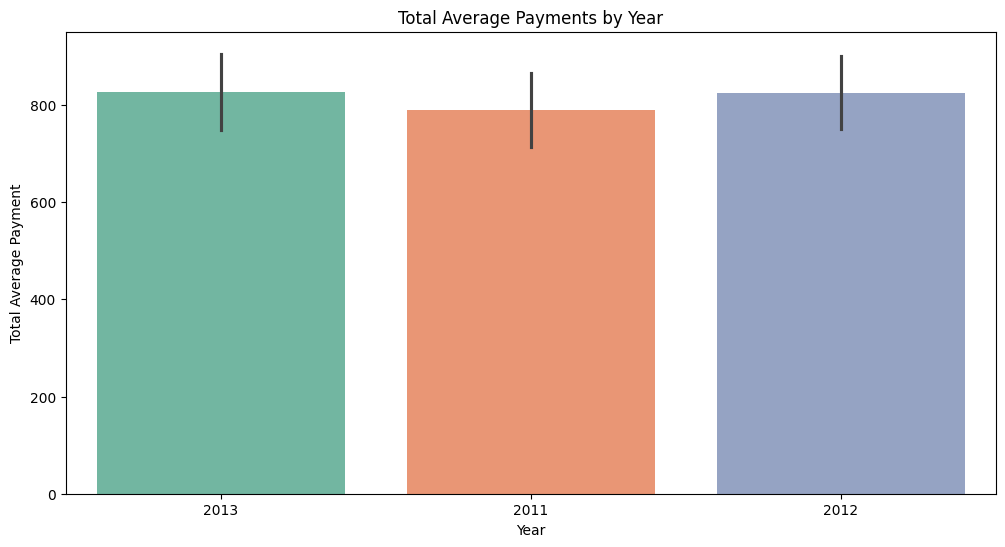

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=total_avg, x='year', y='total_avg_payment', palette='Set2',hue='year')
plt.title('Total Average Payments by Year')
plt.xlabel('Year')
plt.ylabel('Total Average Payment')
plt.show()


In [48]:

# # Assuming `outpatient_inpatient_results` DataFrame has columns:
# # 'provider_id', 'year', 'avg_outpatient_payments', 'outpatient_rank', 'avg_inpatient_payments', and 'inpatient_rank'

# # Set the style for seaborn
# sns.set(style="whitegrid")

# # Convert 'year' to categorical for better control over plotting order
# total_avg['year'] = total_avg['year'].astype('category')

# # Create a figure and axis objects
# fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# # Plot 1: Average Outpatient Payments Ranked per Provider
# sns.lineplot(
#     data=total_avg,
#     x='provider_name',
#     y='total_avg_payment',
#     hue='year',
#     marker='o',
#     ax=ax[0]
# )
# ax[0].set_title("Average Outpatient Payments per Provider by Year")
# ax[0].set_xlabel("Outpatient Provider Rank")
# ax[0].set_ylabel("Average Outpatient Payments")

# # Plot 2: Average Inpatient Payments Ranked per Provider
# sns.lineplot(
#     data=total_avg,
#     x='provider_name',
#     y='total_avg_payment',
#     hue='year',
#     marker='o',
#     ax=ax[1]
# )
# ax[1].set_title("Average Inpatient Payments per Provider by Year")
# ax[1].set_xlabel("Inpatient Provider Rank")
# ax[1].set_ylabel("Average Inpatient Payments")

# # Customize layout and show plot
# plt.tight_layout()
# plt.show()


2. Time Series Analysis on APC Services Charges per Provider

In [49]:
time_series_query='''
-- Consolidate Outpatient Data for Time Series Analysis
WITH outpatient_data AS (
    SELECT 
        provider_id,
        provider_name,
        provider_city,
        apc,
        average_estimated_submitted_charges,
        '2011' AS year
    FROM outpatient_charges_2011
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        provider_city,
        apc,
        average_estimated_submitted_charges,
        '2012' AS year
    FROM outpatient_charges_2012
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        provider_city,
        apc,
        average_estimated_submitted_charges,
        '2013' AS year
    FROM outpatient_charges_2013
)

-- Calculate Average Charges per APC Service
SELECT 
    provider_id,
    provider_name,
    provider_city,
    apc,
    year,
    AVG(average_estimated_submitted_charges) AS avg_apc_charge
FROM outpatient_data
GROUP BY provider_id, apc, year
ORDER BY provider_id, apc, year;
'''

In [50]:
avg_charges=pd.read_sql_query(time_series_query,conn3)

In [51]:
avg_charges

,provider_id,provider_name,provider_city,apc,year,avg_apc_charge
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,0013 - Level II Debridement & Destruction,2011,328.975687
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,0013 - Level II Debridement & Destruction,2012,371.445540
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,0013 - Level II Debridement & Destruction,2013,391.647167
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,0015 - Level III Debridement & Destruction,2011,556.202944
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,0015 - Level III Debridement & Destruction,2012,591.568255
...,...,...,...,...,...,...
131505,670077,METHODIST WEST HOUSTON HOSPITAL,HOUSTON,0336 - Magnetic Resonance Imaging and Magnetic...,2012,3199.294554
131506,670077,METHODIST WEST HOUSTON HOSPITAL,HOUSTON,0368 - Level II Pulmonary Tests,2012,478.750000
131507,670077,METHODIST WEST HOUSTON HOSPITAL,HOUSTON,0377 - Level II Cardiac Imaging,2012,6083.523810
131508,670077,METHODIST WEST HOUSTON HOSPITAL,HOUSTON,0605 - Level 2 Hospital Clinic Visits,2012,189.348765


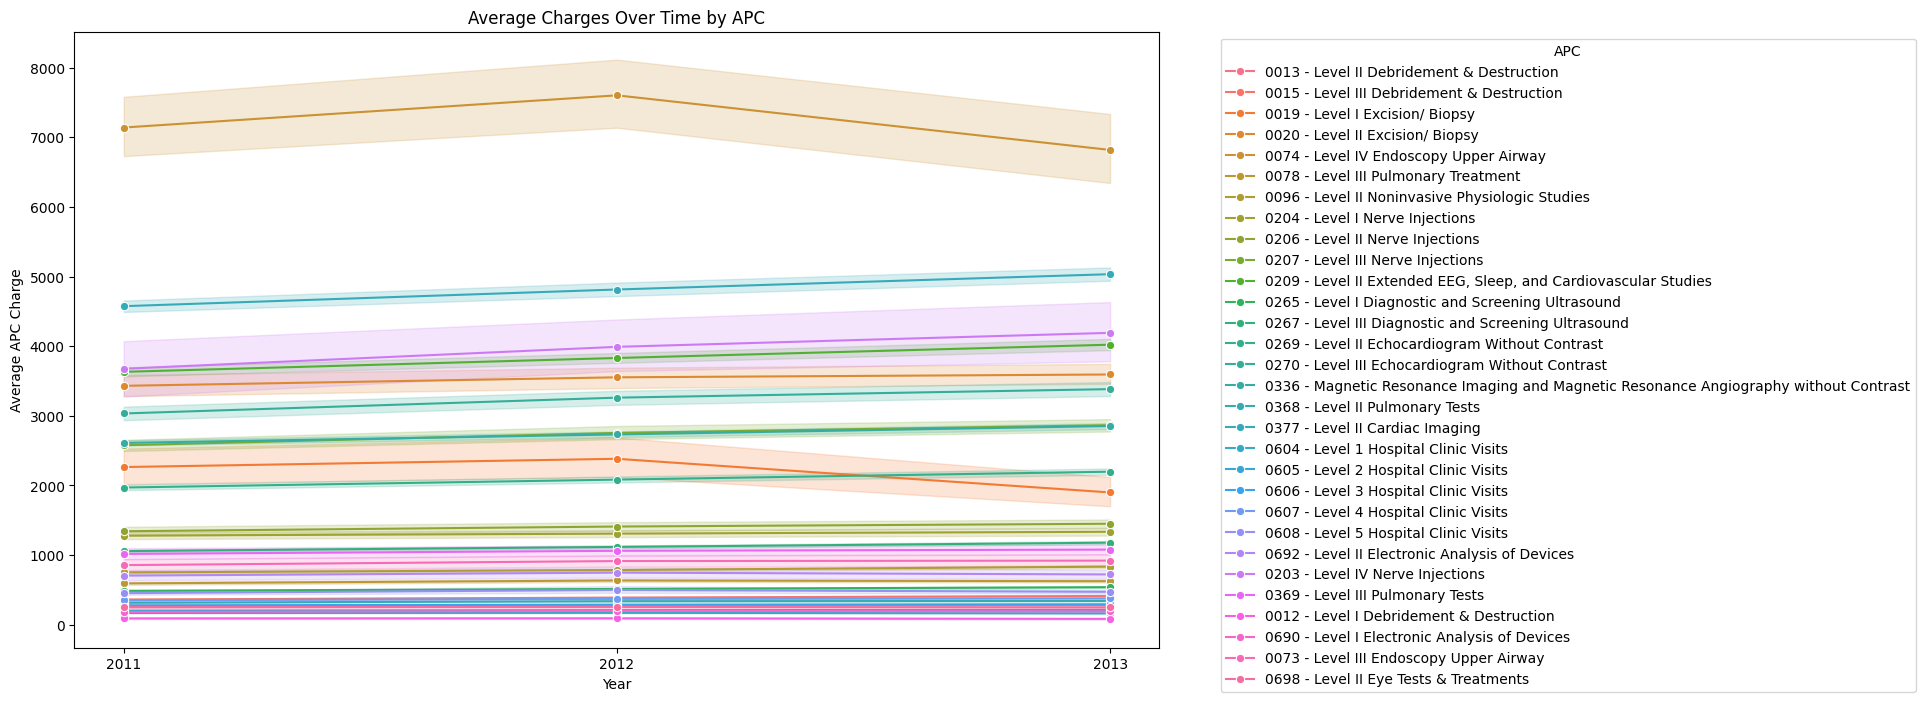

In [52]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_charges, x='year', y='avg_apc_charge', hue='apc', marker='o')
plt.title('Average Charges Over Time by APC')
plt.xlabel('Year')
plt.ylabel('Average APC Charge')
plt.legend(title='APC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\kiong\AppData\Local\Temp\ipykernel_20524\2974551204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_charges, x='year', y='avg_apc_charge', palette='Set3')


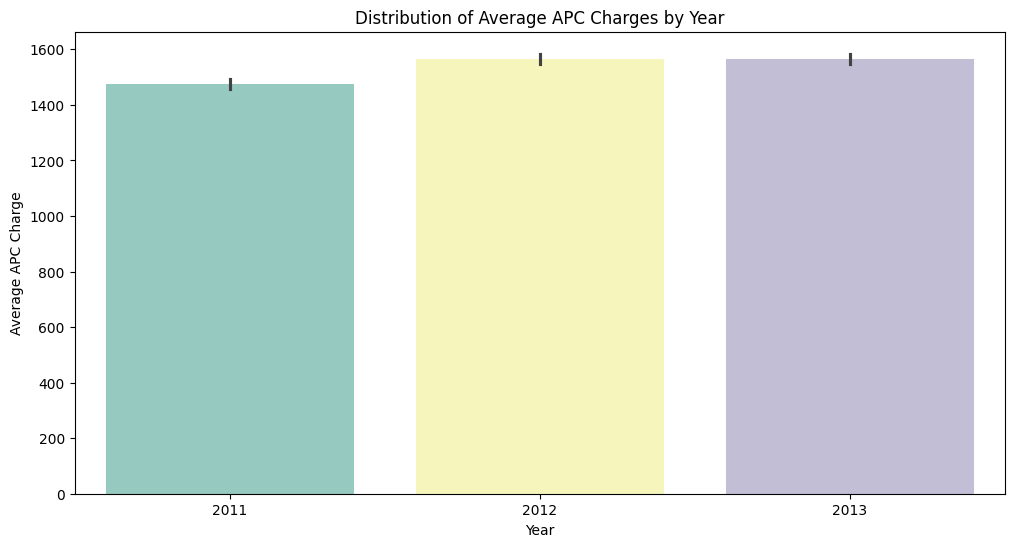

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_charges, x='year', y='avg_apc_charge', palette='Set3')
plt.title('Distribution of Average APC Charges by Year')
plt.xlabel('Year')
plt.ylabel('Average APC Charge')
plt.show()


3. Geographical Analysis on Affordable Providers Offering Emergency Charges

In [54]:
outpatient_concat.head(1)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032


In [55]:
outpatient_concat['apc'].unique()

array(['0013 - Level II Debridement & Destruction',
       '0015 - Level III Debridement & Destruction',
       '0020 - Level II Excision/ Biopsy',
       '0078 - Level III Pulmonary Treatment',
       '0096 - Level II Noninvasive Physiologic Studies',
       '0204 - Level I Nerve Injections',
       '0265 - Level I Diagnostic and Screening Ultrasound',
       '0267 - Level III Diagnostic and Screening Ultrasound',
       '0269 - Level II Echocardiogram Without Contrast',
       '0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast',
       '0368 - Level II Pulmonary Tests',
       '0377 - Level II Cardiac Imaging',
       '0605 - Level 2 Hospital Clinic Visits',
       '0606 - Level 3 Hospital Clinic Visits',
       '0607 - Level 4 Hospital Clinic Visits',
       '0608 - Level 5 Hospital Clinic Visits',
       '0074 - Level IV Endoscopy Upper Airway',
       '0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies',
       '0604 - Level 1 Hospi

In [57]:
inpatient_concat.head(1)

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,15,2459.4,2901.266667,2075.4,G81


In [58]:
inpatient_concat['icd_category'].unique()

array(['G81', 'T79', 'I02', 'D18', 'P12', 'D22', 'B96', 'D31', 'D28',
       'B95', 'D29', 'R77', 'D86', 'R82', 'J03', 'L11', 'D26', 'I01',
       'J02', 'I60', 'R79', 'F50', 'I69', 'F90', 'Y07', 'I66', 'G82',
       'I63', 'J01', 'I67', 'G80', 'D19', 'P11', 'D16', 'F53', 'B97',
       'F52', 'D13', 'D17', 'R73', 'D10', 'J05', 'R74', 'A93', 'D11',
       'I65', 'R78', 'B98', 'P15', 'D36', 'F51', 'Y06', 'A96', 'L13',
       'P10', 'I62', 'R94', 'A95', 'R70', 'D20', 'F98', 'A97', 'F92',
       'D23', 'R90', 'D15', 'D21', 'D30', 'D33', 'F93', 'D81', 'F94',
       'R76', 'D25', 'D35', 'J06', 'D14', 'A92', 'I68', 'D64', 'A98',
       'D12', 'F95', 'D61', 'G83', 'D32', 'J04', 'D60', 'L10', 'D83',
       'P14', 'P13', 'D63', 'F91', 'I61', 'R93', 'L12', 'D82', 'D80',
       'D89'], dtype=object)

In [62]:
geo_analysis='''
-- Consolidate Outpatient Data and Filter for Emergency Services
WITH emergency_outpatient AS (
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        average_total_payments,
        '2011' AS year
    FROM inpatient_charges_2011
    WHERE icd_category IN ('G81', 'T79', 'I02', 'I60', 'I63', 'I66', 'I67', 'J03', 'J01', 'R77', 'R82', 'R79')
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        average_total_payments,
        '2012' AS year
    FROM inpatient_charges_2012
    WHERE icd_category IN ('G81', 'T79', 'I02', 'I60', 'I63', 'I66', 'I67', 'J03', 'J01', 'R77', 'R82', 'R79')
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        average_total_payments,
        '2013' AS year
    FROM inpatient_charges_2013
    WHERE icd_category IN ('G81', 'T79', 'I02', 'I60', 'I63', 'I66', 'I67', 'J03', 'J01', 'R77', 'R82', 'R79')
)

-- Calculate Average Emergency Charges per State
SELECT 
    provider_state,
    provider_name,
    provider_city,
    year,
    AVG(average_total_payments) AS avg_emergency_charge
FROM emergency_outpatient
GROUP BY provider_state, year
ORDER BY provider_state, year;
'''

In [63]:
emergency_charges=pd.read_sql_query(geo_analysis,conn3)

In [64]:
emergency_charges.head()

,provider_state,provider_name,provider_city,year,avg_emergency_charge
0,AL,CHEROKEE MEDICAL CENTER,CENTRE,2011,6526.957389
1,AL,CHEROKEE MEDICAL CENTER,CENTRE,2012,6499.071368
2,AL,CHEROKEE MEDICAL CENTER,CENTRE,2013,6817.791679
3,AZ,BANNER BAYWOOD MEDICAL CENTER,MESA,2011,5804.481909
4,AZ,BANNER HEART HOSPITAL,MESA,2012,5947.478648


4. Top 10 Prominent ICD10 Diagnoses by State

In [ ]:
inpatient_concat.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,15,2459.400000,2901.266667,2075.400000,G81
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,35,2749.942857,4784.514286,4018.542857,T79
2,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,3133.583333,3579.583333,2738.583333,I02
3,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,18,3282.277778,3790.166667,3214.222222,D18
4,370171,W W HASTINGS INDIAN HOSPITAL,100 S BLISS AVENUE,TAHLEQUAH,OK,74464,OK - Tulsa,11,3534.000000,6441.000000,5520.636364,P12


In [ ]:
icd_query='''
-- Consolidate Inpatient Data
WITH inpatient_data AS (
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        total_discharges,
        '2011' AS year
    FROM inpatient_charges_2011
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        total_discharges,
        '2012' AS year
    FROM inpatient_charges_2012
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        total_discharges,
        '2013' AS year
    FROM inpatient_charges_2013
),

-- Calculate Total Discharges by ICD Category and State, then Rank by State
discharges_ranked AS (
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        SUM(total_discharges) AS total_discharges,
        year,
        RANK() OVER (PARTITION BY provider_state, year ORDER BY SUM(total_discharges) DESC) AS diagnosis_rank
    FROM inpatient_data
    GROUP BY provider_state, icd_category, year
)

-- Filter for Top 10 ICD Categories by State
SELECT 
    provider_state,
    provider_name,
    provider_city,
    icd_category,
    total_discharges,
    year
FROM discharges_ranked
WHERE diagnosis_rank <= 10
ORDER BY provider_state, year, diagnosis_rank;
'''

In [ ]:
icd_diagnosis=pd.read_sql_query(icd_query,conn3)

In [ ]:
icd_diagnosis

,provider_state,provider_name,provider_city,icd_category,total_discharges,year
0,AL,CHEROKEE MEDICAL CENTER,CENTRE,D28,47,2011
1,AL,CHEROKEE MEDICAL CENTER,CENTRE,D18,38,2011
2,AL,CHEROKEE MEDICAL CENTER,CENTRE,D31,27,2011
3,AL,CHEROKEE MEDICAL CENTER,CENTRE,I02,25,2011
4,AL,CHEROKEE MEDICAL CENTER,CENTRE,J01,22,2011
...,...,...,...,...,...,...
645,UT,MCKAY DEE HOSPITAL,OGDEN,D11,92,2013
646,UT,MCKAY DEE HOSPITAL,OGDEN,F53,87,2013
647,UT,MCKAY DEE HOSPITAL,OGDEN,R93,86,2013
648,UT,MCKAY DEE HOSPITAL,OGDEN,D32,82,2013


CREATE VIEWS

VIEW 1

In [73]:
# Creating the view in the database for outpatient and inpatient average payments
create_view_query = '''
CREATE VIEW outpatient_inpatient_avg_payments AS
WITH outpatient AS (
    SELECT 
        provider_id, 
        provider_name,
        '2011' AS year,
        AVG(average_total_payments) AS avg_outpatient_payment
    FROM outpatient_charges_2011
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id, 
        provider_name,
        '2012' AS year,
        AVG(average_total_payments) AS avg_outpatient_payment
    FROM outpatient_charges_2012
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id, 
        provider_name,
        '2013' AS year,
        AVG(average_total_payments) AS avg_outpatient_payment
    FROM outpatient_charges_2013
    GROUP BY provider_id, provider_name
),
inpatient AS (
    SELECT 
        provider_id,
        provider_name,
        '2011' AS year,
        AVG(average_medicare_payments) AS avg_inpatient_payment
    FROM inpatient_charges_2011
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        '2012' AS year,
        AVG(average_medicare_payments) AS avg_inpatient_payment
    FROM inpatient_charges_2012
    GROUP BY provider_id, provider_name
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        '2013' AS year,
        AVG(average_medicare_payments) AS avg_inpatient_payment
    FROM inpatient_charges_2013
    GROUP BY provider_id, provider_name
)

-- Combine outpatient and inpatient data and calculate total average payment per provider
SELECT 
    o.provider_id,
    o.provider_name,
    o.year,
    COALESCE(o.avg_outpatient_payment, 0) + COALESCE(i.avg_inpatient_payment, 0) AS total_avg_payment,
    RANK() OVER (ORDER BY (COALESCE(o.avg_outpatient_payment, 0) + COALESCE(i.avg_inpatient_payment, 0)) DESC) AS payment_rank
FROM outpatient o
LEFT JOIN inpatient i 
ON o.provider_id = i.provider_id AND o.year = i.year
ORDER BY payment_rank;
'''

# Execute the query to create the view in the database
conn3.execute(create_view_query)

# Confirm the view creation by querying it



OperationalError: view outpatient_inpatient_avg_payments already exists

VIEW 2

In [74]:
# Create view for emergency charges analysis
create_geo_analysis_view_query = '''
CREATE VIEW emergency_charges_per_state AS
WITH emergency_outpatient AS (
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        average_total_payments,
        '2011' AS year
    FROM inpatient_charges_2011
    WHERE icd_category IN ('G81', 'T79', 'I02', 'I60', 'I63', 'I66', 'I67', 'J03', 'J01', 'R77', 'R82', 'R79')
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        average_total_payments,
        '2012' AS year
    FROM inpatient_charges_2012
    WHERE icd_category IN ('G81', 'T79', 'I02', 'I60', 'I63', 'I66', 'I67', 'J03', 'J01', 'R77', 'R82', 'R79')
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        average_total_payments,
        '2013' AS year
    FROM inpatient_charges_2013
    WHERE icd_category IN ('G81', 'T79', 'I02', 'I60', 'I63', 'I66', 'I67', 'J03', 'J01', 'R77', 'R82', 'R79')
)

-- Calculate Average Emergency Charges per State
SELECT 
    provider_state,
    provider_name,
    provider_city,
    year,
    AVG(average_total_payments) AS avg_emergency_charge
FROM emergency_outpatient
GROUP BY provider_state, year
ORDER BY provider_state, year;
'''

# Execute the query to create the view
conn3.execute(create_geo_analysis_view_query)

# Verify the creation of the view by querying a sample of data from the view
geo_analysis_data = pd.read_sql_query('SELECT * FROM emergency_charges_per_state LIMIT 10', conn3)
geo_analysis_data.head()


,provider_state,provider_name,provider_city,year,avg_emergency_charge
0,AL,CHEROKEE MEDICAL CENTER,CENTRE,2011,6526.957389
1,AL,CHEROKEE MEDICAL CENTER,CENTRE,2012,6499.071368
2,AL,CHEROKEE MEDICAL CENTER,CENTRE,2013,6817.791679
3,AZ,BANNER BAYWOOD MEDICAL CENTER,MESA,2011,5804.481909
4,AZ,BANNER HEART HOSPITAL,MESA,2012,5947.478648


VIEW 3

In [75]:
# Create view for inpatient diagnosis analysis by ICD category and state
create_icd_diagnosis_view_query = '''
CREATE VIEW inpatient_diagnosis_ranked AS
WITH inpatient_data AS (
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        total_discharges,
        '2011' AS year
    FROM inpatient_charges_2011
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        total_discharges,
        '2012' AS year
    FROM inpatient_charges_2012
    UNION ALL
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        total_discharges,
        '2013' AS year
    FROM inpatient_charges_2013
),

discharges_ranked AS (
    SELECT 
        provider_state,
        provider_name,
        provider_city,
        icd_category,
        SUM(total_discharges) AS total_discharges,
        year,
        RANK() OVER (PARTITION BY provider_state, year ORDER BY SUM(total_discharges) DESC) AS diagnosis_rank
    FROM inpatient_data
    GROUP BY provider_state, icd_category, year
)

-- Filter for Top 10 ICD Categories by State
SELECT 
    provider_state,
    provider_name,
    provider_city,
    icd_category,
    total_discharges,
    year
FROM discharges_ranked
WHERE diagnosis_rank <= 10
ORDER BY provider_state, year, diagnosis_rank;
'''

# Execute the query to create the view
conn3.execute(create_icd_diagnosis_view_query)

# Verify the creation of the view by querying a sample of data from the view
icd_diagnosis_data = pd.read_sql_query('SELECT * FROM inpatient_diagnosis_ranked LIMIT 10', conn3)
icd_diagnosis_data.head()


,provider_state,provider_name,provider_city,icd_category,total_discharges,year
0,AL,CHEROKEE MEDICAL CENTER,CENTRE,D28,47,2011
1,AL,CHEROKEE MEDICAL CENTER,CENTRE,D18,38,2011
2,AL,CHEROKEE MEDICAL CENTER,CENTRE,D31,27,2011
3,AL,CHEROKEE MEDICAL CENTER,CENTRE,I02,25,2011
4,AL,CHEROKEE MEDICAL CENTER,CENTRE,J01,22,2011


VIEW 4

In [77]:
# Create view for outpatient charges time series analysis by APC service
create_outpatient_time_series_view_query = '''
CREATE VIEW outpatient_apc_time_series AS
WITH outpatient_data AS (
    SELECT 
        provider_id,
        provider_name,
        provider_city,
        apc,
        average_estimated_submitted_charges,
        '2011' AS year
    FROM outpatient_charges_2011
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        provider_city,
        apc,
        average_estimated_submitted_charges,
        '2012' AS year
    FROM outpatient_charges_2012
    UNION ALL
    SELECT 
        provider_id,
        provider_name,
        provider_city,
        apc,
        average_estimated_submitted_charges,
        '2013' AS year
    FROM outpatient_charges_2013
)

-- Calculate Average Charges per APC Service
SELECT 
    provider_id,
    provider_name,
    provider_city,
    apc,
    year,
    AVG(average_estimated_submitted_charges) AS avg_apc_charge
FROM outpatient_data
GROUP BY provider_id, apc, year
ORDER BY provider_id, apc, year;
'''

# Execute the query to create the view
conn3.execute(create_outpatient_time_series_view_query)

# # Verify the creation of the view by querying a sample of data from the view
# time_series_data = pd.read_sql_query('SELECT * FROM outpatient_apc_time_series LIMIT 10', conn3)
# time_series_data.head()


OperationalError: view outpatient_apc_time_series already exists